# Tabla de Contenidos

1. [Introducción](#Introducción)
2. [Carga de librerías y lectura del dataset](#Carga-de-librerías-y-lectura-del-dataset)
3. [Análisis exploratorio y preprocesamiento](#Análisis-exploratorio-y-preprocesamiento)
4. [Modelos predictivos de clasificación](#Modelos-predictivos-de-clasificación)
7. [Entrenamiento y validación de los modelos](#Entrenamiento-y-validación-de-los-modelos)
8. [Optimización y evaluación de los modelos](#Optimización-y-evaluación-de-los-modelos)
9. [Modelos predictivos de regresión](#Modelos-predictivos-de-regresion)

# Introducción

El Dataset **ENCUESTAS_CONSOLIDADO.xlsx**, contiene la unificación de los resultados de una encuesta realizada en  la 
Joya de los Sachas, en la cual se tienen preguntas relacionadas a la recolección de desechos así como acerca del 
conocimiento y compromiso con el reciclaje.

**Objetivo: **
    1. Predecir el nivel de compromiso con el reciclaje
    2. Predecir la calificación del servicio de recolección de residuos

**Objetivos específicos**

    - Realizar un análisis exploratorio y descriptivo de Dataset
    - Realizar preprocesamiento de Dataset
    - Reaizar un anáisis predictivo usando: Regresión Logística, Random Forest y SVM.
    - Comparar los resultados y seección de mejor modelo
    - Reaizar un anáisis predictivo usando: Regresión Lineal Simple y Polinomial.


**Variables del dataset**

**Id.-** Numero del encuestado en el grupo

**Grupo.-** Grupo al que pertenece el encuestado

**Coordenada_X.-** coordenada de latitud

**Coordenada_Y.-** coordenada de longitud

**Barrio.-** Barrio del encuestado

**Sexo.-** sexo del encuestado

**Edad.-** edad del encuestado

**Habitantes_vivienda.-** cantidad de personas que viven en la vivienda del encuestado.

**Pregunta1.-** Nivel de conocimiento sobre el sistema de gestion de residuos solidos

**Pregunta2.-** Calificacion del servicio de recoleccion de residuos solidos en su sector

**Pregunta3.-** Mejoras para optimizar el sistema actual de gestion de residuos

**Pregunta4.-** Calificacion del nivel de conciencia ambiental en su barrio respecto a la gestion y aprovechamiento de los residuos solidos

**Pregunta5.-** Se necesita aplicar mas programas educativos sobre reciclaje en la ciudad

**Pregunta6.-** Compromiso con el reciclaje y la proteccion del medio ambiente

**Pregunta7.-** Disposicion a participar en actividades de educacion ambiental centradas en la gestion de residuos solidos

**Pregunta8.-** Calificacion del servicio de barrido de calles y espacios publicos en la ciudad

**Pregunta9.-** Implementacion de contenedores de basura en cada esquina y sectores prioritarios de la ciudad

**Pregunta10.-** Separacion de los residuos organicos de los comunes en su hogar

**Pregunta11.-** Aprovechamiento de los desechos organicos generados en su hogar

**Pregunta12.-** Cerca de su domicilio hay recicladoras que compran materiales reciclados

**Pregunta13.-** Cerca de su domicilio hay contenedores para depositar botellas plasticas que se puede reciclar

**Pregunta14.-** Entrega materiales como papel, carton y botellas plasticas, a recicladores que pasan por su hogar

**Pregunta15.-** Aspectos que dificultan realizar una clasificacion de residuos en su hogar

**Pregunta16.-** Que tipo de residuos podria clasificar en su hogar

**Pregunta17.-** Compromiso en participar en un proceso de caracterizacion de residuos

**IMPORTANTE** Cabe mencionar que el Dataset tuvo un procesamiento manual adicional en excel, para unificar los 4 archivos: 
    GRUPO 1 FINAL.xlsx, GRUPO 2 FINAL.xlsx, GRUPO 3 FINAL.xlsx, GRUPO 4 FINAL.xlsx.
    Adicional se unificaron las respuestas en una sola columna, renombrando por Pregunta1, Pregunta2, hasta la Pregunta17.

# Carga de librerías y lectura del dataset

## Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score, roc_curve, auc, f1_score, mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Lectura del dataset

In [2]:
# Load the Excel file
file_path = 'ENCUESTAS_CONSOLIDADO.xlsx'
data = pd.read_excel(file_path)

# Análisis exploratorio y preprocesamiento

In [3]:
# Display the first few rows of the dataframe
data.head()

,Id,Grupo,Coordenada_X,Coordenada_Y,Barrio,Sexo,Edad,Habitantes_vivienda,Pregunta1,Pregunta2,...,Pregunta8,Pregunta9,Pregunta10,Pregunta11,Pregunta12,Pregunta13,Pregunta14,Pregunta15,Pregunta16,Pregunta17
0,1,Grupo 1,-0.293586,-76.853538,Luz de América,Hombre,33,3.0,Poco Informado,Bueno,...,Regular,SÍ,No,No se aprovecha,No,No,No,Falta de espacio para recipientes,Botellas plásticas,No
1,2,Grupo 1,-0.293585,-76.853534,Luz de América,Mujer,35,1.0,Poco Informado,Bueno,...,Regular,SÍ,No,No se aprovecha,No,No,Sí,Falta de espacio para recipientes,Cartón,Sí
2,3,Grupo 1,-0.293428,-76.853756,Luz de América,Mujer,60,3.0,Informado,Bueno,...,Regular,No,SÍ,No se aprovecha,No,No,Sí,Falta de espacio para recipientes,Cartón,No
3,4,Grupo 1,-0.292937,-76.853895,Luz de América,Mujer,34,2.0,Desconocimiento,Bueno,...,Regular,SÍ,SÍ,No se aprovecha,Sí,No,Sí,Falta de espacio para recipientes,Cartón,No
4,5,Grupo 1,-0.292868,-76.854166,Luz de América,Hombre,50,4.0,Informado,Malo,...,Bueno,SÍ,No,No se aprovecha,No,No,Sí,Falta de espacio para recipientes,Botellas plásticas,Sí


In [4]:
data["Pregunta6"].value_counts() #variable objetivo para el modelo de clasificación

Pregunta6
5 - 7     244
8 - 10    185
1 - 4      36
Name: count, dtype: int64

In [5]:
# Verificar valores nulos en el conjunto de datos
missing_values = data.isnull().sum()

# Mostrar los valores nulos
missing_values

Id                     0
Grupo                  0
Coordenada_X           0
Coordenada_Y           0
Barrio                 0
Sexo                   0
Edad                   0
Habitantes_vivienda    1
Pregunta1              0
Pregunta2              1
Pregunta3              1
Pregunta4              2
Pregunta5              0
Pregunta6              0
Pregunta7              1
Pregunta8              0
Pregunta9              1
Pregunta10             0
Pregunta11             0
Pregunta12             0
Pregunta13             0
Pregunta14             0
Pregunta15             0
Pregunta16             1
Pregunta17             0
dtype: int64

In [6]:
#cantidad de registros con valores nulos
data.isnull().sum().sum()

8

In [7]:
#registros con valores nulos
nan_rows = data[data.isnull().any(axis=1)]
nan_rows

,Id,Grupo,Coordenada_X,Coordenada_Y,Barrio,Sexo,Edad,Habitantes_vivienda,Pregunta1,Pregunta2,...,Pregunta8,Pregunta9,Pregunta10,Pregunta11,Pregunta12,Pregunta13,Pregunta14,Pregunta15,Pregunta16,Pregunta17
20,21,Grupo 1,-0.303716,-76.857298,Machala,Hombre,24,6.0,Informado,Bueno,...,Malo,SÍ,SÍ,Compostaje,Sí,No,Sí,Falta de espacio para recipientes,Enlatados,Sí
71,72,Grupo 1,-0.288341,-76.854481,25 de Diciembre,Hombre,18,NaN,Informado,Bueno,...,No se cuenta con el servicio,SÍ,No,No se aprovecha,No,No,No,Pérdida de tiempo al clasificar,Ninguno,No
89,90,Grupo 1,-0.287632,-76.856216,25 de Diciembre,Mujer,28,3.0,Informado,Regular,...,No se cuenta con el servicio,NaN,SÍ,No se aprovecha,No,No,Sí,Falta de espacio para recipientes,Botellas plásticas,No
219,220,Grupo 3,-0.298861,-76.858641,JUMANDY,Mujer,38,7.0,Informado,Bueno,...,Bueno,No,SÍ,Compostaje,No,No,Sí,Desconocimiento de la forma de reciclar,Cartón,No
238,239,Grupo 3,-0.294578,-76.857153,1 de mayo,Hombre,38,3.0,Muy informado,Excelente,...,Bueno,SÍ,No,No se aprovecha,Sí,No,Sí,Falta de espacio para recipientes,Ninguno,Sí
287,288,Grupo 3,-0.296656,-76.85832,La libertad,Mujer,23,4.0,Poco Informado,Bueno,...,Bueno,SÍ,SÍ,No se aprovecha,Desconoce,No,Sí,Desconocimiento de las ventajas del reciclaje,Botellas plásticas,Sí
298,299,Grupo 3,-0.303675,-76.862601,Santa Rita,Hombre,50,4.0,Desconocimiento,NaN,...,Excelente,SÍ,SÍ,Compostaje,No,No,Sí,Falta de espacio para recipientes,Vidrio,Sí
319,320,Grupo 3,-0.285347,-76.852702,Santa rosa,Mujer,57,4.0,Poco Informado,Malo,...,Regular,No,No,Compostaje,Desconoce,No,No,Falta de espacio para recipientes,NaN,Sí


In [8]:
#Imputación para variables convalores nulos, con la moda
data['Habitantes_vivienda'] = data['Habitantes_vivienda'].fillna(value = data['Habitantes_vivienda'].mode()[0], inplace = False)
data['Pregunta2'] = data['Pregunta2'].fillna(value = data['Pregunta2'].mode()[0], inplace = False)
data['Pregunta3'] = data['Pregunta3'].fillna(value = data['Pregunta3'].mode()[0], inplace = False)
data['Pregunta4'] = data['Pregunta4'].fillna(value = data['Pregunta4'].mode()[0], inplace = False)
data['Pregunta7'] = data['Pregunta7'].fillna(value = data['Pregunta7'].mode()[0], inplace = False)
data['Pregunta9'] = data['Pregunta9'].fillna(value = data['Pregunta9'].mode()[0], inplace = False)
data['Pregunta16'] = data['Pregunta16'].fillna(value = data['Pregunta16'].mode()[0], inplace = False)

In [9]:
#despues de la inputación ya no se tienen  registros con valores nulos
nan_rows = data[data.isnull().any(axis=1)]
nan_rows

,Id,Grupo,Coordenada_X,Coordenada_Y,Barrio,Sexo,Edad,Habitantes_vivienda,Pregunta1,Pregunta2,...,Pregunta8,Pregunta9,Pregunta10,Pregunta11,Pregunta12,Pregunta13,Pregunta14,Pregunta15,Pregunta16,Pregunta17


In [10]:
#se eliminan del dataframe, las columnas que no son necesarias para los modelos
data = data.drop(columns = ["Id","Grupo","Coordenada_X","Coordenada_Y","Barrio","Habitantes_vivienda"])

In [11]:
# Se detectó que algunos valores contrien espacios adicionales, se decide quitar espacios 
#al inicio y al final de cada columna
preguntas = ["Pregunta1","Pregunta2","Pregunta3","Pregunta4","Pregunta5","Pregunta6","Pregunta7","Pregunta8","Pregunta9","Pregunta10","Pregunta11","Pregunta12","Pregunta13","Pregunta14","Pregunta15","Pregunta16","Pregunta17"]

for pregunta in preguntas:
    data[pregunta] = data[pregunta].str.strip()

In [12]:
#Se realiza label encoding a la data, de modo que se cambien los valores diferentes de las variables por números enteros
data['Sexo'] = data['Sexo'].map({'Mujer':0, 'Hombre':1})
data['Pregunta1'] = data['Pregunta1'].map({'Desconocimiento':0, 'Poco Informado':1, 'Informado': 2, 'Muy informado':3})
data['Pregunta2'] = data['Pregunta2'].map({'Malo':0, 'Regular':1, 'Bueno': 2, 'Excelente':3})
data['Pregunta3'] = data['Pregunta3'].map({'Mejora en la recolección selectiva de residuos':2,
                                           'Capacitación del personal encargado de la gestión de residuos':1,
                                           'Implementar plantas de reciclaje': 0,
                                           'Mayor difusión de programas de reciclaje':3})
data['Pregunta4'] = data['Pregunta4'].map({'Bajo':0, 'Moderado':1, 'Alto': 2})
data['Pregunta5'] = data['Pregunta5'].map({'No':0, 'Sí':1})
#se decide a la variable objetivo de clasificación, sumarle al siguiente nivel, debido a que es muy poca la cantidad 
#de respuestas con la categoría "1 - 4".
data['Pregunta6'] = data['Pregunta6'].map({'1 - 4':0, '5 - 7':0, '8 - 10':1}) 
data['Pregunta7'] = data['Pregunta7'].map({'No':0, 'Sí':1})
data['Pregunta8'] = data['Pregunta8'].map({'No se cuenta con el servicio':0,'Malo':1, 'Regular':2, 'Bueno': 3, 'Excelente':4})
data['Pregunta9'] = data['Pregunta9'].map({'No':0, 'SÍ':1})
data['Pregunta10'] = data['Pregunta10'].map({'No':0, 'SÍ':1})
data['Pregunta11'] = data['Pregunta11'].map({'No se aprovecha':0, 'Ración para animales':1, 'Compostaje':2})
data['Pregunta12'] = data['Pregunta12'].map({'No':0, 'Sí':1, 'Desconoce':2})
data['Pregunta13'] = data['Pregunta13'].map({'No':0, 'Sí':1})
data['Pregunta14'] = data['Pregunta14'].map({'No':0, 'Sí':1})
data['Pregunta15'] = data['Pregunta15'].map({'Desconocimiento de las ventajas del reciclaje':0, 
                                             'Desconocimiento de la forma de reciclar':1, 
                                             'Pérdida de tiempo al clasificar':2,
                                             'Falta de espacio para recipientes':3
                                            })
data['Pregunta16'] = data['Pregunta16'].map({'Ninguno':0, 
                                             'Pilas':1,
                                             'Fundas plásticas':2,
                                             'Botellas plásticas':3,
                                             'Tetra pack':4,
                                             'Espuma flex':5,
                                             'Enlatados':6,
                                             'Vidrio':7,
                                             'Cartón':8,
                                             'Papel':9
                                            })
data['Pregunta17'] = data['Pregunta17'].map({'No':0, 'Sí':1})
data

,Sexo,Edad,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5,Pregunta6,Pregunta7,Pregunta8,Pregunta9,Pregunta10,Pregunta11,Pregunta12,Pregunta13,Pregunta14,Pregunta15,Pregunta16,Pregunta17
0,1,33,1,2,2,2,1,1,0,2,1,0,0,0,0,0,3,3,0
1,0,35,1,2,2,0,1,0,1,2,1,0,0,0,0,1,3,8,1
2,0,60,2,2,1,1,0,1,0,2,0,1,0,0,0,1,3,8,0
3,0,34,0,2,1,1,1,0,1,2,1,1,0,1,0,1,3,8,0
4,1,50,2,0,1,1,1,0,1,3,1,0,0,0,0,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0,3,2,2,3,2,1,0,1,3,1,0,0,0,0,1,2,8,0
461,1,48,1,2,1,1,1,1,1,2,1,1,1,0,0,1,3,6,0
462,0,36,2,2,2,1,1,1,1,2,1,1,1,2,1,1,2,3,0
463,0,38,1,1,3,1,1,1,1,2,1,1,2,0,0,1,3,3,1


In [13]:
data['Pregunta6'].value_counts()

Pregunta6
0    280
1    185
Name: count, dtype: int64

In [14]:
#matriz de correlación
data.corr()

,Sexo,Edad,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5,Pregunta6,Pregunta7,Pregunta8,Pregunta9,Pregunta10,Pregunta11,Pregunta12,Pregunta13,Pregunta14,Pregunta15,Pregunta16,Pregunta17
Sexo,1.000000,0.115492,0.068820,-0.025575,-0.009458,0.136677,0.058821,0.023317,0.011791,-0.022882,0.033201,-0.073960,-0.080096,-0.112442,0.061171,0.051596,0.019016,-0.033701,-0.119273
Edad,0.115492,1.000000,0.095472,0.035770,0.004371,0.035613,-0.044750,0.013421,-0.011681,0.051642,-0.012822,-0.016719,0.010604,0.029189,0.068937,-0.036788,-0.044722,-0.034905,-0.031017
Pregunta1,0.068820,0.095472,1.000000,0.125589,0.069812,0.031171,-0.096715,0.033038,-0.018203,0.130164,-0.019133,0.080734,0.087039,0.118054,0.141554,0.078349,0.072426,-0.044982,-0.042043
Pregunta2,-0.025575,0.035770,0.125589,1.000000,0.063386,0.031944,-0.042164,-0.019336,-0.072092,0.211172,-0.098893,0.000954,-0.013777,0.161289,0.170991,0.023285,0.038715,0.068801,-0.025573
Pregunta3,-0.009458,0.004371,0.069812,0.063386,1.000000,-0.013602,0.060392,-0.130978,-0.027577,0.200980,0.056487,0.048404,0.101949,0.044027,0.204817,0.126131,0.046862,-0.056872,-0.074633
Pregunta4,0.136677,0.035613,0.031171,0.031944,-0.013602,1.000000,-0.079023,0.140336,0.004220,-0.079199,0.027807,0.083219,0.007970,-0.057097,-0.112614,0.093162,0.025811,-0.028919,-0.013100
Pregunta5,0.058821,-0.044750,-0.096715,-0.042164,0.060392,-0.079023,1.000000,-0.025814,0.139321,-0.000718,0.057564,-0.012342,0.032643,-0.031437,0.027885,0.019173,-0.033254,-0.019406,0.086746
Pregunta6,0.023317,0.013421,0.033038,-0.019336,-0.130978,0.140336,-0.025814,1.000000,0.133321,-0.059760,0.030280,0.166227,0.120889,0.052869,-0.047700,0.065795,-0.016660,0.085498,0.164007
Pregunta7,0.011791,-0.011681,-0.018203,-0.072092,-0.027577,0.004220,0.139321,0.133321,1.000000,-0.018063,0.102325,0.009267,0.080093,-0.011101,0.116582,0.112830,-0.038011,0.027226,0.112892
Pregunta8,-0.022882,0.051642,0.130164,0.211172,0.200980,-0.079199,-0.000718,-0.059760,-0.018063,1.000000,-0.002964,-0.011632,0.046779,0.218180,0.213035,0.112507,0.076723,0.024992,-0.007637


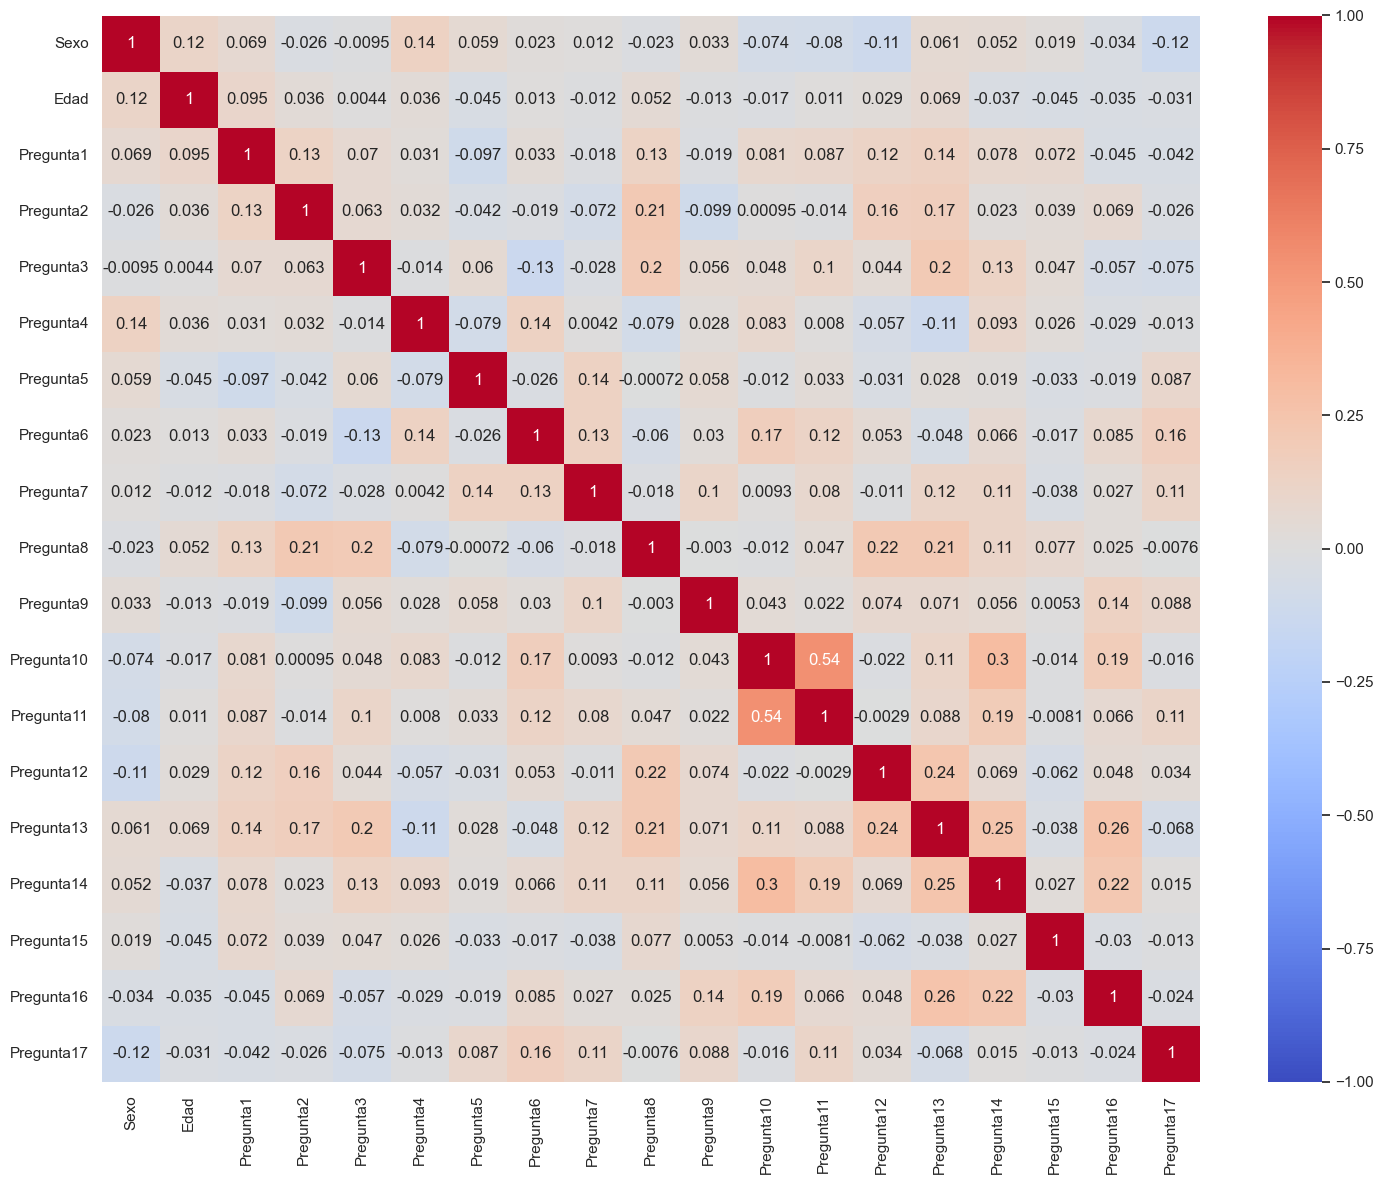

In [15]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(data.corr(), 
            vmin=-1.0, vmax=1.0, 
            cmap="coolwarm", annot=True)
plt.tight_layout()

# Entrenamiento y validación de los modelos

In [16]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=["Sexo","Edad","Pregunta1","Pregunta2","Pregunta3","Pregunta4","Pregunta5","Pregunta7","Pregunta8","Pregunta9","Pregunta10","Pregunta11","Pregunta12","Pregunta13","Pregunta14","Pregunta15","Pregunta16","Pregunta17"]

X1_all = data[estimators]
y = data["Pregunta6"]
X = X1_all

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X1_all, y, test_size=0.2, random_state=42)

In [18]:
# Definimos los modelos de Clasificacion
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision tree': DecisionTreeClassifier(max_depth=3, min_samples_split=10),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Realizamos el entrenamiento y evaluación de los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n")
    print(f"\n{name} Model:")
    print("Matriz confusion: \n",confusion_matrix(y_test, y_pred))
    print("Calsification report: \n",classification_report(y_test, y_pred))
    print("Cohen Kappa score: \n",cohen_kappa_score(y_test, y_pred))
    fpr3, tpr3, _ = roc_curve(y_test, y_pred)
    print("Roc Curve: \n",auc(fpr3, tpr3))




Logistic Regression Model:
Matriz confusion: 
 [[36 14]
 [27 16]]
Calsification report: 
               precision    recall  f1-score   support

           0       0.57      0.72      0.64        50
           1       0.53      0.37      0.44        43

    accuracy                           0.56        93
   macro avg       0.55      0.55      0.54        93
weighted avg       0.55      0.56      0.55        93

Cohen Kappa score: 
 0.09408410548823953
Roc Curve: 
 0.546046511627907



Decision tree Model:
Matriz confusion: 
 [[49  1]
 [38  5]]
Calsification report: 
               precision    recall  f1-score   support

           0       0.56      0.98      0.72        50
           1       0.83      0.12      0.20        43

    accuracy                           0.58        93
   macro avg       0.70      0.55      0.46        93
weighted avg       0.69      0.58      0.48        93

Cohen Kappa score: 
 0.10244988864142546
Roc Curve: 
 0.5481395348837209



SVM Model:
Matriz 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Optimización y evaluación de los modelos

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scaler = StandardScaler()
# Escalar los datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Concatenar de nuevo las características y la variable objetivo para hacer el re-muestreo manualmente
# X_train_resampled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_resampled = pd.DataFrame(X_train, columns=X.columns)
X_train_resampled['Pregunta6'] = y_train.values

# Configuración de hiperparámetros para SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

# Configuración de hiperparámetros para Random Forest
forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Definición del grid de hiperparámetros para regresión logistica
rl_param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [1000],
    'class_weight': ['balanced', None]
}

# Búsqueda en rejilla para SVM
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Búsqueda en rejilla para Random Forest
forest_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), forest_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Búsqueda de hiperparámetros con validación cruzada para RL
rl_grid_search = GridSearchCV(LogisticRegression(random_state=42), rl_param_grid, cv=5, scoring='accuracy')

# Separar las clases
df_class_0 = X_train_resampled[X_train_resampled['Pregunta6'] == 0]
df_class_1 = X_train_resampled[X_train_resampled['Pregunta6'] == 1]

# Sobremuestrear la clase 0 y 2
df_class_0_over = resample(df_class_0, replace=True, n_samples=len(df_class_1), random_state=42)
# df_class_2_over = resample(df_class_2, replace=True, n_samples=len(df_class_1), random_state=42)

# Recombinar las clases
# df_resampled = pd.concat([df_class_0_over, df_class_1, df_class_2_over])
df_resampled = pd.concat([df_class_0_over, df_class_1])

# Separar las características y la variable objetivo después de sobremuestrear
X_train_resampled = df_resampled.drop('Pregunta6', axis=1)
y_train_resampled = df_resampled['Pregunta6']

# Repetir la búsqueda de hiperparámetros con el conjunto de datos balanceado
svm_grid_search.fit(X_train_resampled, y_train_resampled)
forest_grid_search.fit(X_train_resampled, y_train_resampled)
rl_grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores modelos
best_svm = svm_grid_search.best_estimator_
best_forest = forest_grid_search.best_estimator_
best_rl = rl_grid_search.best_estimator_

# Evaluar los modelos ajustados
# y_pred_svm_best = best_svm.predict(X_test_scaled)
# y_pred_forest_best = best_forest.predict(X_test_scaled)
y_pred_svm_best = best_svm.predict(X_test)
y_pred_forest_best = best_forest.predict(X_test)
y_pred_rl_best = best_rl.predict(X_test)

# Matrices de confusión y reportes de clasificación para los mejores modelos
best_svm_cm = confusion_matrix(y_test, y_pred_svm_best)
best_svm_report = classification_report(y_test, y_pred_svm_best)
best_svm_accuracy_score = accuracy_score(y_test, y_pred_svm_best)
best_svm_cohen_kappa_score = cohen_kappa_score(y_test, y_pred_svm_best)
best_svm_fpr3, best_svm_tpr3, _ = roc_curve(y_test, y_pred_svm_best)
best_svm_auc = auc(best_svm_fpr3, best_svm_tpr3)

best_forest_cm = confusion_matrix(y_test, y_pred_forest_best)
best_forest_report = classification_report(y_test, y_pred_forest_best)
best_forest_accuracy_score = accuracy_score(y_test, y_pred_forest_best)
best_forest_cohen_kappa_score = cohen_kappa_score(y_test, y_pred_forest_best)
best_forest_fpr3, best_forest_tpr3, _ = roc_curve(y_test, y_pred_forest_best)
best_forest_auc = auc(best_forest_fpr3, best_forest_tpr3)

best_rl_cm = confusion_matrix(y_test, y_pred_rl_best)
best_rl_report = classification_report(y_test, y_pred_rl_best)
best_rl_accuracy_score = accuracy_score(y_test, y_pred_rl_best)
best_rl_cohen_kappa_score = cohen_kappa_score(y_test, y_pred_rl_best)
best_rl_fpr3, best_rl_tpr3, _ = roc_curve(y_test, y_pred_rl_best)
best_rl_auc = auc(best_rl_fpr3, best_rl_tpr3)

print("best_svm_cm: \n", best_svm_cm)
print("best_svm_report: \n", best_svm_report)
print("best_svm_accuracy_score: \n", best_svm_accuracy_score)
print("best_svm_cohen_kappa_score: \n", best_svm_cohen_kappa_score)
print("best_svm_auc: \n", best_svm_auc)
print("best_forest_cm: \n", best_forest_cm)
print("best_forest_report: \n", best_forest_report)
print("best_forest_accuracy_score: \n", best_forest_accuracy_score)
print("best_forest_cohen_kappa_score: \n", best_forest_cohen_kappa_score)
print("best_forest_auc: \n", best_forest_auc)
print("best_rl_cm: \n", best_rl_cm)
print("best_rl_report: \n", best_rl_report)
print("best_rl_accuracy_score: \n", best_rl_accuracy_score)
print("best_rl_cohen_kappa_score: \n", best_rl_cohen_kappa_score)
print("best_rl_auc: \n", best_rl_auc)

In [ ]:
print("SVM OPTIMIZADO \n")
print("best_svm_cm: \n", best_svm_cm)
print("best_svm_report: \n", best_svm_report)
print("best_svm_accuracy_score: \n", best_svm_accuracy_score)
print("best_svm_cohen_kappa_score: \n", best_svm_cohen_kappa_score)
print("best_svm_auc: \n", best_svm_auc)
print("\n")
print("BOSQUES ALEATORIOS OPTIMIZADO \n")
print("best_forest_cm: \n", best_forest_cm)
print("best_forest_report: \n", best_forest_report)
print("best_forest_accuracy_score: \n", best_forest_accuracy_score)
print("best_forest_cohen_kappa_score: \n", best_forest_cohen_kappa_score)
print("best_forest_auc: \n", best_forest_auc)
print("\n")
print("REGRESIÓN LOGISTICA OPTIMIZADO \n")
print("best_rl_cm: \n", best_rl_cm)
print("best_rl_report: \n", best_rl_report)
print("best_rl_accuracy_score: \n", best_rl_accuracy_score)
print("best_rl_cohen_kappa_score: \n", best_rl_cohen_kappa_score)
print("best_rl_auc: \n", best_rl_auc)

**1. Precisión (Accuracy)**

SVM: 0.645
Random Forest: 0.645
Regresión Logística: 0.602
Tanto SVM como Random Forest tienen una precisión del 64.5%, mientras que la Regresión Logística tiene un 60.2%.

**2. F1-Score**
SVM:

Clase 0: 0.63

Clase 1: 0.66

Random Forest:

Clase 0: 0.62

Clase 1: 0.67

Regresión Logística:

Clase 0: 0.60

Clase 1: 0.60

SVM y Random Forest tienen f1-scores similares, con una ligera ventaja para Random Forest en la clase 1. La Regresión Logística tiene un f1-score más bajo para ambas clases.

**3. Cohen Kappa Score**

SVM: 0.299

Random Forest: 0.301

Regresión Logística: 0.209

Cohen Kappa mide el acuerdo entre las predicciones y las etiquetas verdaderas, ajustando por el acuerdo al azar. Random Forest tiene un puntaje ligeramente mejor (0.301), lo que indica un mejor acuerdo que SVM (0.299) y Regresión Logística (0.209).

**4. AUC (Área bajo la curva ROC)**

SVM: 0.652

Random Forest: 0.654

Regresión Logística: 0.606

El AUC refleja la capacidad del modelo para distinguir entre las clases. Random Forest tiene el mayor AUC, seguido de cerca por SVM, mientras que la Regresión Logística queda rezagada.

**5. Matriz de Confusión**

SVM:

0 (Negativo): 28 correctos, 22 incorrectos.

1 (Positivo): 32 correctos, 11 incorrectos.

Random Forest:

0 (Negativo): 27 correctos, 23 incorrectos.

1 (Positivo): 33 correctos, 10 incorrectos.

Regresión Logística:

0 (Negativo): 28 correctos, 22 incorrectos.

1 (Positivo): 28 correctos, 15 incorrectos.

La matriz de confusión muestra que tanto SVM como Random Forest tienen un desempeño similar, aunque Random Forest clasifica correctamente más positivos (33) que SVM (32).

**Conclusión:**
Mejor Modelo: **Random Forest** parece ser el mejor modelo en general. Tiene el mejor Cohen Kappa Score (0.301), un AUC ligeramente superior (0.654), y un buen equilibrio entre precisión y f1-score. Además, clasifica correctamente más instancias de la clase positiva que los otros modelos.

# Modelos predictivos de regresion

## Regresion lineal simple

In [ ]:
# Separar la variable independiente (X) y la dependiente (y)
X = data['Pregunta1'].values.reshape(-1, 1)
y = data['Pregunta2'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# Escalar los datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación (R^2): {r2}')

## Regresion polinomial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Separar la variable independiente (X) y la dependiente (y)
X = data[['Pregunta1','Pregunta3','Pregunta8','Pregunta9']].values
y = data['Pregunta2'].values

# Transformar X a un espacio polinomial con el grado deseado
poly = PolynomialFeatures(degree=2)  # Cambia el grado según sea necesario
X_poly = poly.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
# Escalar los datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión lineal y entrenarlo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')

**Conclusión**

Se probaron varios modelos de regresión para la predicción de la calificación del servicio de recolección de residuos, sin embargo, ninguno es capaz de realizar la predicción de una forma aceptable, por lo cual, la conclusión es que la encuesta así como los resultados de las variables disponibles, es difícil predecir la calificación del servicio de recolección de residuos con precisión. Podríamos considerar la recolección de datos adicionales, es decir una encuesta exclusivamente aplicada referente al servicio de recolección

Existen varias razones por las cuales ningún modelo ha logrado un buen desempeño en la predicción en este caso. Aquí algunas posibles causas:

1. Calidad y Relevancia de las Variables Predictoras:
Variables no relevantes: Algunas de las variables en el conjunto de datos pueden no ser relevantes para la predicción de la calificación del servicio de recolección de residuos. Esto puede diluir la capacidad predictiva de los modelos.
Falta de variables clave: Es posible que falten variables cruciales que realmente influyen en la calificación del servicio. Si los factores más importantes no están representados en los datos, ningún modelo podrá predecir con precisión.
2. Relación No Lineal Compleja:
Relación compleja: Si la relación entre las variables predictoras y la variable objetivo es altamente no lineal o compleja, los modelos simples o incluso algunos modelos más avanzados pueden tener dificultades para capturar estas relaciones.
Interacciones complejas entre variables: Podría haber interacciones entre las variables que no están siendo capturadas adecuadamente por los modelos tradicionales o incluso por modelos más sofisticados.
3. Ruido en los Datos:
Ruido o errores en los datos: Datos con mucho ruido, errores de entrada, o valores atípicos pueden afectar negativamente la capacidad de un modelo para aprender patrones significativos.
Medición inexacta: Si la calificación del servicio de recolección de residuos no está bien medida o está influenciada por factores externos no capturados en los datos, esto podría generar predicciones inconsistentes.
4. Cantidad y Variedad de los Datos:
Cantidad de datos insuficiente: Si el conjunto de datos es pequeño o no tiene suficientes ejemplos representativos de las diferentes situaciones, los modelos pueden no tener suficiente información para generalizar correctamente.
Falta de variabilidad: Si las variables predictoras no varían lo suficiente (por ejemplo, la mayoría de los encuestados dan calificaciones similares), los modelos pueden tener dificultades para encontrar patrones significativos.
5. Modelos Inadecuados:
Selección de modelo inapropiado: Es posible que los modelos que hemos probado hasta ahora no sean los más adecuados para capturar la estructura de los datos.
Hiperparámetros no óptimos: La falta de ajuste fino en los hiperparámetros de los modelos podría estar limitando su rendimiento.
6. Multicolinealidad:
Colinealidad entre variables: Si las variables predictoras están altamente correlacionadas entre sí, puede dificultar que los modelos identifiquen cuáles son realmente importantes para la predicción, llevando a coeficientes inestables y modelos menos efectivos.
7. Problema de Formulación del Modelo:
Variable objetivo difícil de predecir: Es posible que la variable objetivo (calificación del servicio) esté influenciada por factores subjetivos o externos no representados en los datos, lo que hace difícil predecirla con precisión.